In [5]:
import pandas as pd
import numpy as np
import env
import acquire
import os

In [4]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''This function uses credentials from an env file to log into a database'''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [5]:
def new_zillow_db():
    '''The function uses the get_connection function to connect to a database and retrieve the zillow dataset'''
    return pd.read_sql('''SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, 
    yearbuilt, taxamount, fips from properties_2017 LEFT JOIN propertylandusetype USING(propertylandusetypeid)
    WHERE propertylandusedesc IN ("Single Family Residential", "Inferred Single Family Residential");''', get_connection('zillow'))

In [ ]:
df = new_zillow_db()

In [3]:
def get_zillow_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_zillow_db()
        
        # Cache data
        df.to_csv('zillow.csv')
        
    return df

In [32]:
df = get_zillow_data()

In [33]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [34]:
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [36]:
df.bedroomcnt = df.bedroomcnt.astype(int)

In [37]:
df.yearbuilt = df.yearbuilt.astype(int)

In [38]:
df.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

In [39]:
df.fips = df.fips.astype(int)

In [40]:
df = df.rename(columns={'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 'calculatedfinishedsquarefeet': 'sqft', 
                        'taxvaluedollarcnt': 'tax_value'})

In [41]:
df = df.rename(columns={'yearbuilt': 'year', 'taxamount': 'tax_amount'})

In [42]:
df

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037
...,...,...,...,...,...,...,...
2152857,4,4.0,4375.0,422400.0,2015,13877.56,6037
2152859,4,3.0,2262.0,960756.0,2015,13494.52,6059
2152860,4,4.5,3127.0,536061.0,2014,6244.16,6059
2152862,3,2.5,1974.0,424353.0,2015,5302.70,6059


In [43]:
df.bedrooms.value_counts()

3     962944
4     633608
2     334221
5     150671
6      25117
1      22895
7       4792
0       4397
8       1103
9        290
10       118
11        34
13        15
12        12
14         7
15         5
18         3
16         2
25         1
Name: bedrooms, dtype: int64

<AxesSubplot:>

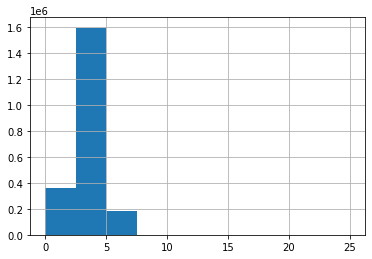

In [44]:
df.bedrooms.hist()

<AxesSubplot:>

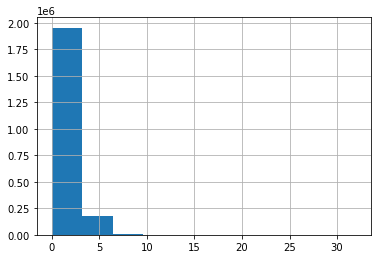

In [45]:
df.bathrooms.hist()

<AxesSubplot:>

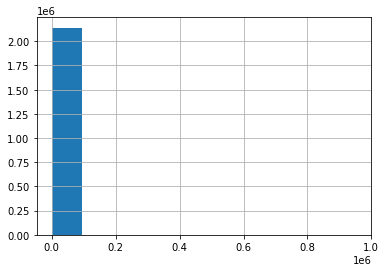

In [46]:
df.sqft.hist()

<AxesSubplot:>

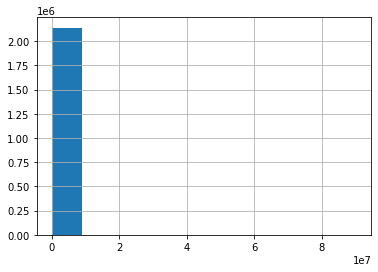

In [47]:
df.tax_value.hist()

<AxesSubplot:>

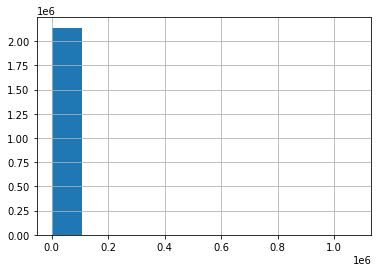

In [48]:
df.tax_amount.hist()

<AxesSubplot:>

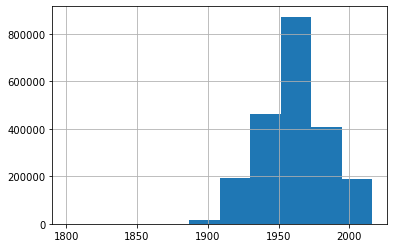

In [49]:
df.year.hist()

In [50]:
df.sqft.sort_values()

58438           1.0
1895867         1.0
2017746         1.0
1276354         1.0
1359289         1.0
             ...   
530834      52503.0
830510      59220.0
1432167     63692.0
1689333    531118.0
849924     952576.0
Name: sqft, Length: 2140235, dtype: float64

In [51]:
df.tax_value.sort_values()

1151824          22.0
1765722          22.0
818180           22.0
1259496          22.0
1539743          22.0
              ...    
430030     70416358.0
2134693    71067500.0
1618394    83196095.0
950855     88020448.0
530834     90188462.0
Name: tax_value, Length: 2140235, dtype: float64

In [52]:
df.tax_amount.sort_values()

2104722          6.34
849981          13.36
1775803         13.36
128743          13.36
1366850         13.36
              ...    
2134693     824166.91
430030      841059.04
1618394     994030.96
950855     1052070.50
530834     1078101.87
Name: tax_amount, Length: 2140235, dtype: float64

In [53]:
df.year.sort_values()

1005350    1801
1823374    1801
1048332    1801
1104176    1807
2029623    1812
           ... 
720945     2016
1916217    2016
1765726    2016
53820      2016
1873169    2016
Name: year, Length: 2140235, dtype: int64

In [18]:
df = df[df['bedrooms'] != 0]

In [20]:
df = df[df['bathrooms'] != 0]

In [21]:
df = df[df['bedrooms'] < 8]

In [22]:
df = df[df['bathrooms'] < 6]

In [24]:
df = df[df.sqft > 700]

In [25]:
df = df[df.sqft < 10000]

In [26]:
df = df[df.tax_value < 600000]

In [27]:
df = df[df.tax_value > 1000]

In [28]:
df = df[df.year > 1899]

In [29]:
df = df[df.tax_amount < 8000]

In [ ]:
# add all the individual steps into one function to wrangle the zillow database

In [31]:
# create a function to acquire and prepare the zillow database
def wrangle_zillow():
    '''This function acquires the zillow dataset from the Codeup database using a SQL query and returns a cleaned
    dataframe from a csv file. Observations with null values are dropped and column names are changed for
    readability. Values expected as integers are converted to integer types (year, bedrooms, fips).'''
    # use the get_zillow_data function to acquire the dataset and save it to a csv
    df = get_zillow_data()
    # drop rows with null values
    df = df.dropna()
    # change bedroom count to an integer
    df.bedroomcnt = df.bedroomcnt.astype(int)
    # change year built to an integer
    df.yearbuilt = df.yearbuilt.astype(int)
    # change fips to an integer
    df.fips = df.fips.astype(int)
    # rename columns for readability
    df = df.rename(columns={'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 'calculatedfinishedsquarefeet': 'sqft', 
                        'taxvaluedollarcnt': 'tax_value', 'yearbuilt': 'year', 'taxamount': 'tax_amount'})
    # remove rows with 0 bedrooms
    df = df[df['bedrooms'] != 0]
    # remove rows with 0 bathrooms
    df = df[df['bathrooms'] != 0]
    # remove rows with 8 or more bedrooms
    df = df[df['bedrooms'] < 8]
    # remove rows with 6 or more bathrooms
    df = df[df['bathrooms'] < 6]
    # remove rows with values less than or equal to 700 square feet
    df = df[df.sqft > 700]
    # remove rows with values greater than or equal to 10_000 square feet
    df = df[df.sqft < 10000]
    # remove rows with tax values greater than or equal to 600000
    df = df[df.tax_value < 600000]
    # remove rows with tax values less than or equal to 1000
    df = df[df.tax_value > 1000]
    # remove rows with a year less than or equal to 1899
    df = df[df.year > 1899]
    # remove rows with a tax amount greater than or equal to 8000
    df = df[df.tax_amount < 8000]
    return df